# Increasing customer of time deposit campaign

## Project Brief
You, as a data scientist in Personalized Marketing Team, are trying to find the opportunity to increase time deposit offering and you were assigning to analyze and develop presentation report for CEO.

Questions :
- With the given dataset, how are you going to recommend to Business Unit (with compelling data-driven evidence) to boost the following metrics:
	- conversion rate = number of customers that purchases time deposit / total customers
	- sales volume = amount of time deposit volume
	
- If you can collect more data, what would you collect to improve the recommendation or the metrics
	

## Process
- Setting Up
- Load And Making EDA (Exploratory Data Analysis)
- Cleaning and Preparing Data
- Train, Test model
- Select and Evaluate model
- Conclusion

### Setting Up
We will install the library for manipulate (`tiduverse`) and fro model training (`caret` `xgboost` `randomForest`)

In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
install.packages("caret")
library(caret)

Installing caret [6.0-94] ...
	OK [linked cache]


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [4]:
install.packages("xgboost")
library(xgboost)

Installing xgboost [1.7.5.1] ...
	OK [linked cache]



Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




In [5]:
install.packages("randomForest")
library(randomForest)

Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/randomForest_4.7-1.1.tar.gz' ...
	OK [downloaded 256.8 Kb in 0.9 secs]
Installing randomForest [4.7-1.1] ...
	OK [installed binary]
Moving randomForest [4.7-1.1] into the cache ...
	OK [moved to cache in 0.28 milliseconds]


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




### Load And Making EDA (Exploratory Data Analysis)
- we will load dataset from `.csv` to dataframe.
- we will split data to `Categorical` (feature) dataset and `Numerical` (feature) dataset and explore it.


In [6]:
df <- read_delim("datascience-full.csv", delim =  ";")
head(df)

Rows: 45211 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (10): job, marital, education, default, housing, loan, contact, month, p...
dbl  (7): age, balance, day, duration, campaign, pdays, previous

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [7]:
summary(df)
## the dataset has no missing value

      age            job              marital           education        
 Min.   :18.00   Length:45211       Length:45211       Length:45211      
 1st Qu.:33.00   Class :character   Class :character   Class :character  
 Median :39.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :40.94                                                           
 3rd Qu.:48.00                                                           
 Max.   :95.00                                                           
   default             balance         housing              loan          
 Length:45211       Min.   : -8019   Length:45211       Length:45211      
 Class :character   1st Qu.:    72   Class :character   Class :character  
 Mode  :character   Median :   448   Mode  :character   Mode  :character  
                    Mean   :  1362                                        
                    3rd Qu.:  1428                                        
                    Max.   :1021

In [8]:
glimpse(df)

Rows: 45,211
Columns: 17
$ age       <dbl> 58, 44, 33, 47, 33, 35, 28, 42, 58, 43, 41, 29, 53, 58, 57, …
$ job       <chr> "management", "technician", "entrepreneur", "blue-collar", "…
$ marital   <chr> "married", "single", "married", "married", "single", "marrie…
$ education <chr> "tertiary", "secondary", "secondary", "unknown", "unknown", …
$ default   <chr> "no", "no", "no", "no", "no", "no", "no", "yes", "no", "no",…
$ balance   <dbl> 2143, 29, 2, 1506, 1, 231, 447, 2, 121, 593, 270, 390, 6, 71…
$ housing   <chr> "yes", "yes", "yes", "yes", "no", "yes", "yes", "yes", "yes"…
$ loan      <chr> "no", "no", "yes", "no", "no", "no", "yes", "no", "no", "no"…
$ contact   <chr> "unknown", "unknown", "unknown", "unknown", "unknown", "unkn…
$ day       <dbl> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, …
$ month     <chr> "may", "may", "may", "may", "may", "may", "may", "may", "may…
$ duration  <dbl> 261, 151, 76, 92, 198, 139, 217, 380, 50, 55, 222, 137, 517,…
$ campaign  <db

In [9]:
df %>%
	count(y)

y,n
<chr>,<int>
no,39922
yes,5289


### Take Away
- the dataset has `17 features` (1 label) and `45,211 observations`
- 17 features including `10 categorical` (charector) and `7 numerical` (double)
- the dataset has no missing value

### Implementation note
1. we will covert categorical to factor in cleaning process

### Explore Categorical Features

In [10]:
## Explore Categorical Feature
cat_feature <- df %>% 
	select(2:5, 7:9, 11, 16:17)
head(cat_feature)

job,marital,education,default,housing,loan,contact,month,poutcome,y
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
management,married,tertiary,no,yes,no,unknown,may,unknown,no
technician,single,secondary,no,yes,no,unknown,may,unknown,no
entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
unknown,single,unknown,no,no,no,unknown,may,unknown,no
management,married,tertiary,no,yes,no,unknown,may,unknown,no


Percentage of our client

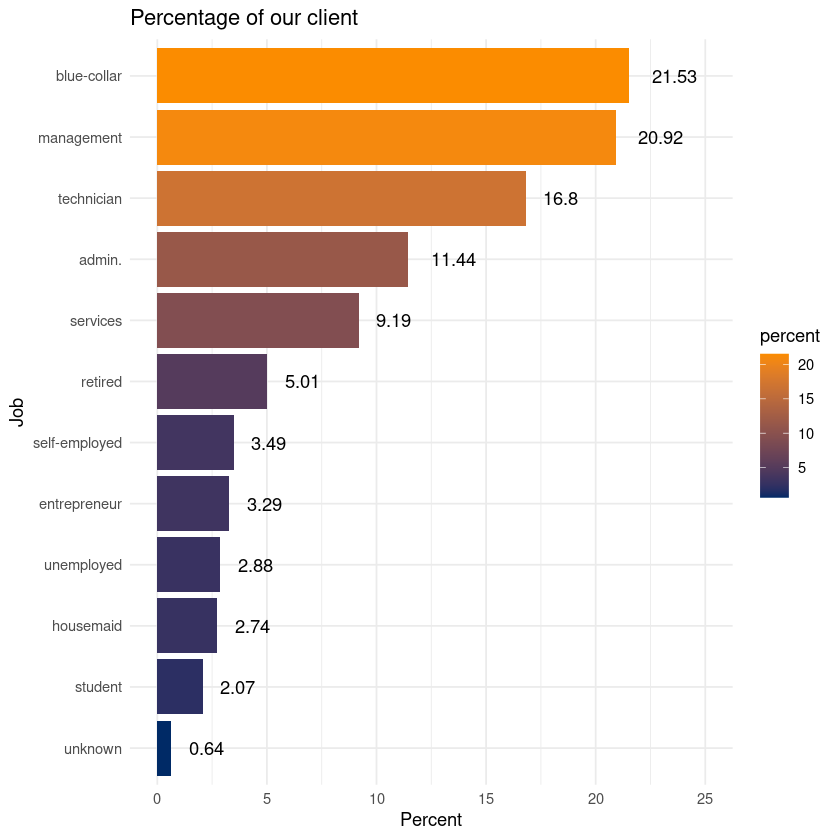

In [11]:
## percentage of job
percentage_job <- cat_feature %>%
	count(job, sort = T) %>%
	mutate(percent = round(100 * n / sum(n), 2))

p1 <- percentage_job %>%
	ggplot(aes(reorder(job, percent), percent, fill = percent)) +
	geom_text(aes(label = percent, hjust = -0.5)) +
	geom_col() +
	coord_flip() +
	theme_minimal() +
	labs(title = "Percentage of our client", y = "Percent", x = "Job") +
	scale_fill_gradient(high = "#fb8c00ff", low = "#002a66ff") +
	ylim(0, 25)

p1

Conversion Rate for each Job  

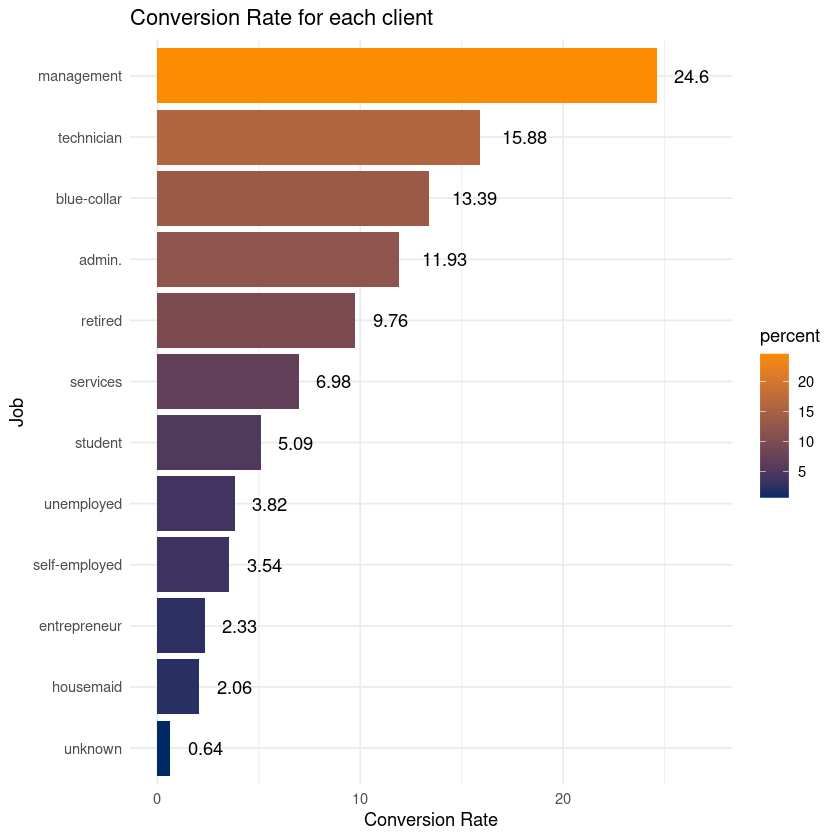

In [12]:
## Conversion Rate for each Job
percentage_job_yes <- cat_feature %>% 
	filter(y == "yes") %>%
	count(job, sort = T) %>%
	mutate(percent = round(100 * n / sum(n), 2))

p2 <- percentage_job_yes %>%
	ggplot(aes(reorder(job, percent), percent, fill = percent)) +
	geom_text(aes(label = percent, hjust = -0.5)) +
	geom_col() +
	coord_flip() +
	theme_minimal() +
	labs(title = "Conversion Rate for each client", y = "Conversion Rate", x = "Job") +
	scale_fill_gradient(high = "#fb8c00ff", low = "#002a66ff") +
	ylim(0, 27)
p2

Customer credit and purchased a time deposit

In [12]:
## Credit in Default
cat_feature %>%
	filter(y == "yes") %>%
	group_by(default) %>%
	summarize(count_yes = n()) %>%
	mutate(percentage = round(100 * count_yes / sum(count_yes), 2))

default,count_yes,percentage
<chr>,<int>,<dbl>
no,5237,99.02
yes,52,0.98


Customer hous loaning and purchased a time deposit

In [13]:
## Housing
cat_feature %>%
	filter(y == "yes") %>%
	group_by(loan) %>%
	summarize(count_yes = n()) %>%
	mutate(percentage = round(100 * count_yes / sum(count_yes), 2))

loan,count_yes,percentage
<chr>,<int>,<dbl>
no,4805,90.85
yes,484,9.15


Customer personal loaning and purchased a time deposit

In [14]:
## Loaning
cat_feature %>%
	filter(y == "yes") %>%
	group_by(housing) %>%
	summarize(count_yes = n()) %>%
	mutate(percentage = round(100 * count_yes / sum(count_yes), 2))

housing,count_yes,percentage
<chr>,<int>,<dbl>
no,3354,63.41
yes,1935,36.59


In [15]:
## contact type
percnetage_contact_type <- cat_feature %>%
	group_by(contact, y) %>%
	summarize(n = n()) %>%
	mutate(conversion_rate = round(100 * n / sum(n), 2))
percnetage_contact_type

`summarise()` has grouped output by 'contact'. You can override using the
`.groups` argument.
New names:
• `` -> `...1`


contact,y,n,conversion_rate
<chr>,<chr>,<int>,<dbl>
cellular,no,24916,85.08
cellular,yes,4369,14.92
telephone,no,2516,86.58
telephone,yes,390,13.42
unknown,no,12490,95.93
unknown,yes,530,4.07


Conversion rate for each contract type

In [16]:
## Conversion rate vs. contact type
percnetage_contact_type %>%
	filter(y == "yes") %>%
	select(-n, -y)

New names:
• `` -> `...1`


contact,conversion_rate
<chr>,<dbl>
cellular,14.92
telephone,13.42
unknown,4.07


In [17]:
## Conversion rate by contact type vs. Job
conversion_rate_job <- cat_feature %>%
	group_by(job ,contact, y) %>%
	summarize(n = n()) %>%
	mutate(conversion_rate = round(100 * n / sum(n), 2))

conversion_rate_job %>%
	filter(y == "yes")

`summarise()` has grouped output by 'job', 'contact'. You can override using
the `.groups` argument.
New names:
• `` -> `...1`


job,contact,y,n,conversion_rate
<chr>,<chr>,<chr>,<int>,<dbl>
admin.,cellular,yes,529,15.77
admin.,telephone,yes,41,14.19
admin.,unknown,yes,61,3.99
blue-collar,cellular,yes,514,9.97
blue-collar,telephone,yes,38,6.22
blue-collar,unknown,yes,156,3.93
entrepreneur,cellular,yes,89,9.33
entrepreneur,telephone,yes,16,18.39
entrepreneur,unknown,yes,18,4.04


In [19]:
## Top contact type vs. Job
conversion_rate_job %>%
	filter(y == "yes") %>%
	ungroup() %>%
	group_by(job) %>%
	slice_max(conversion_rate, n = 1) %>%
	select(-y, -n) %>%
	arrange(desc(contact))


New names:
• `` -> `...1`


job,contact,conversion_rate
<chr>,<chr>,<dbl>
entrepreneur,telephone,18.39
retired,telephone,31.85
admin.,cellular,15.77
blue-collar,cellular,9.97
housemaid,cellular,11.23
management,cellular,16.44
self-employed,cellular,14.11
services,cellular,12.13
student,cellular,35.29


Does previous outcome effect a purchasing time deposit ?

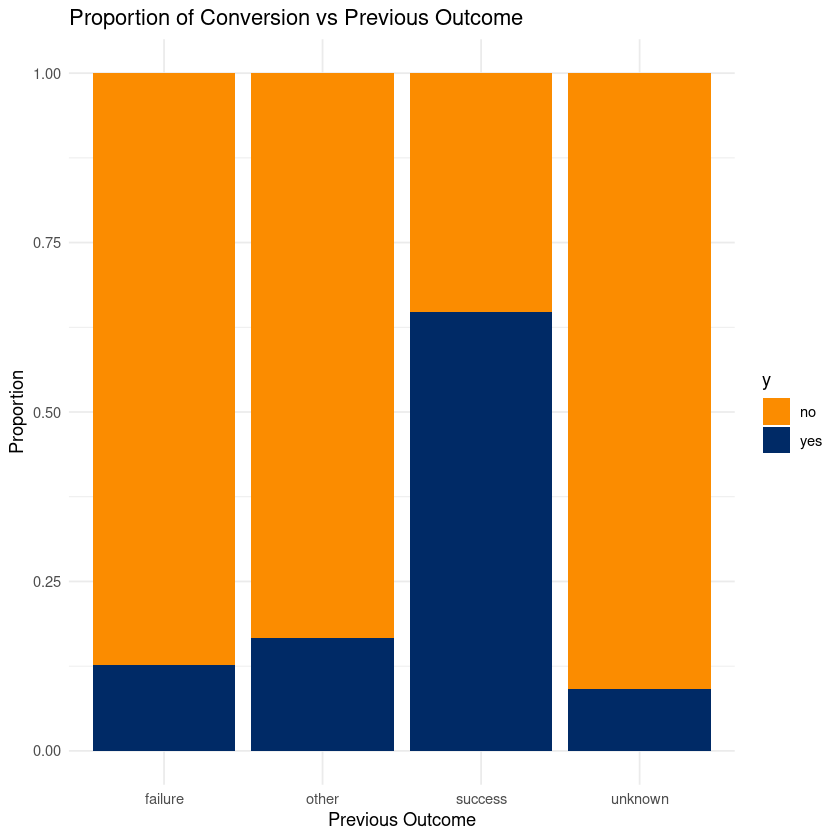

In [20]:
## previous outcome vs purchased a time deposit
cat_feature %>%
	ggplot(aes(poutcome, fill = y)) +
	geom_bar(position = "fill") +
	scale_fill_manual( values = c("#fb8c00ff", "#002a66ff")) +
	theme_minimal() +
	labs(title = "Proportion of Conversion vs Previous Outcome",
		 y = "Proportion",
		 x = "Previous Outcome")
	

### Take Away
- around 50% of all our client are `management` client, `technician` client, `blue-collar` client (3 out of 12)
- `management` client has highest conversion rate (24.6%) in time deposit campaign follwing by `technician` client (15.88%) and `blue-collar` client (13.39%)
- from all of client who interest in our time deposit campaign found that :
	- client who has `no credit` seem to be interested on time deposit ( no credit 99.02% vs. credit 0.98% )
	- client who has `no house loaning` seem to be interested on time deposit ( no house loaning 90.85% vs. house loaning 9.15% )
	- client who has `no personal loaning` seem to be interested on time deposit ( no pernal loaning 63.41% vs. pernal loaning 36.59 )
- conversion rate for each contact type, we found that (conversion rate for eanh type of contact)
	- cellular has 14.92%
	- telephone has 13.42%
- but if we compare conversion rate of contact type with client, we found that
	-  client who is an `entrepreneur` or a `retirement`, seem to be interested on time deposit if we contract with telephone 
	-  the `other clients` (management, technician, ... ) , seem to be interested on time deposit if we contract with cellular
- for previous marketing campaign that success with that client trending to be succes for next campaign

### Explore Numerical Features

In [21]:
## Explore Numerical Feature
num_feature <- df %>% 
	select(1, 6, 10, 12:15, 17)
head(num_feature)

age,balance,day,duration,campaign,pdays,previous,y
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
58,2143,5,261,1,-1,0,no
44,29,5,151,1,-1,0,no
33,2,5,76,1,-1,0,no
47,1506,5,92,1,-1,0,no
33,1,5,198,1,-1,0,no
35,231,5,139,1,-1,0,no


age

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


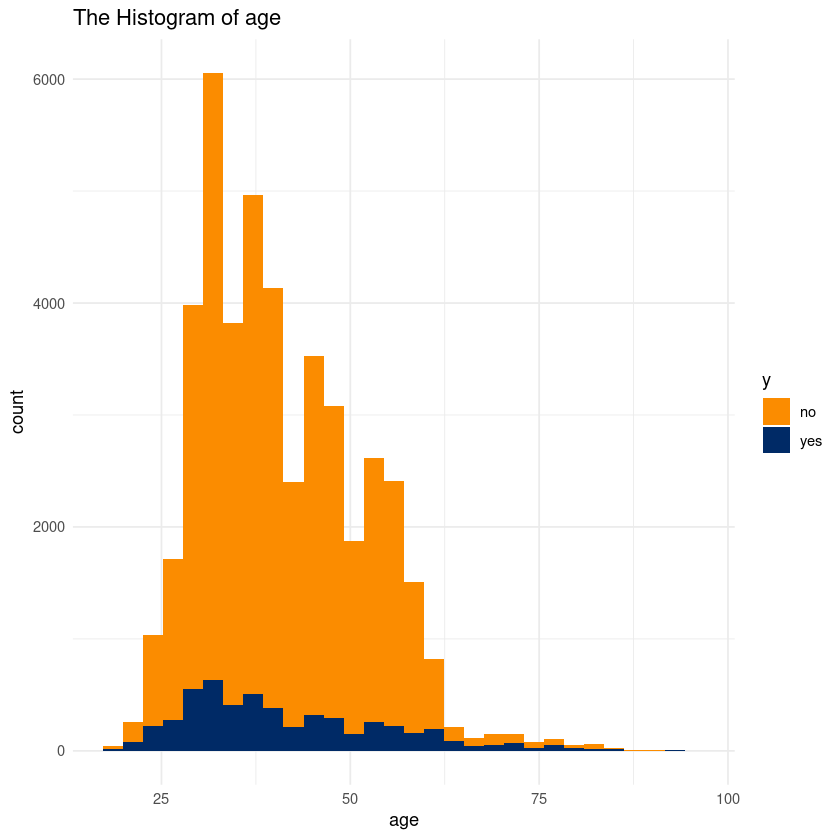

In [22]:
# age
num_feature %>%
	ggplot(aes(age, fill = y)) +
	geom_histogram() +
	scale_fill_manual( values = c("#fb8c00ff", "#002a66ff")) +
	labs(title =  "The Histogram of age") +
	theme_minimal()

the distribution of age is right-skew with mean, median, sd and IQR below :

In [23]:
num_feature %>%
	summarize(Avg_age = mean(age), Median_age = median(age), sd = sd(age), IQR = IQR(age))

Avg_age,Median_age,sd,IQR
<dbl>,<dbl>,<dbl>,<dbl>
40.93621,39,10.61876,15


balance - average yearly balance, in euros

Warning message:
“Removed 9194 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_bar()`).”


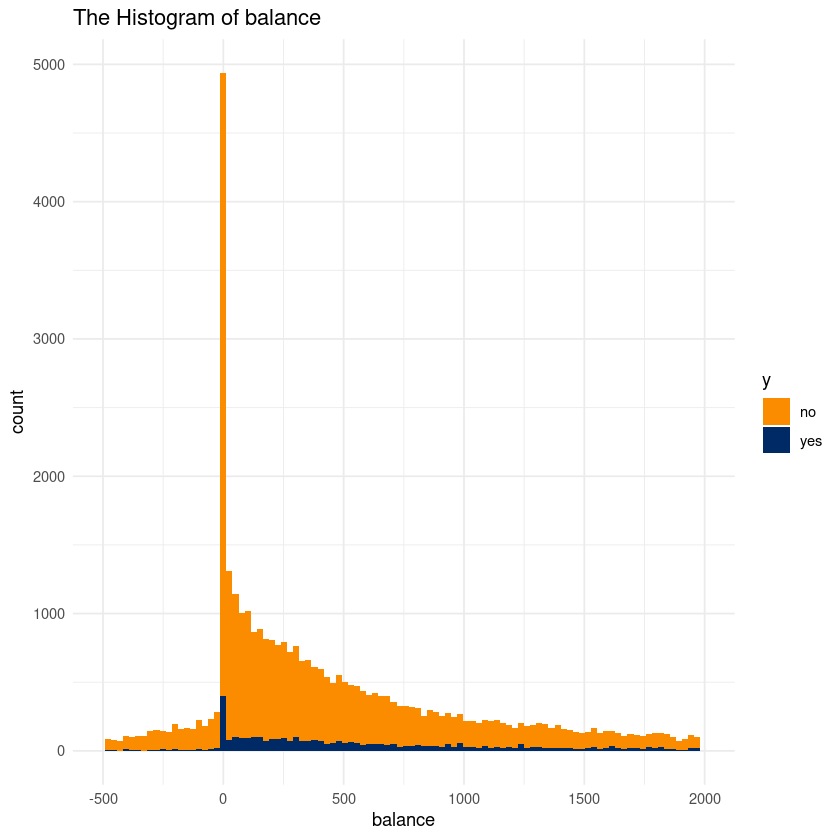

In [24]:
## balance
num_feature %>%
	ggplot(aes(balance, fill = y)) +
	geom_histogram(bins = 100) +
	scale_fill_manual( values = c("#fb8c00ff", "#002a66ff")) +
	labs(title =  "The Histogram of balance") +
	xlim(-500, 2000) +
	theme_minimal()

## some observation containing negative value and right-skew distribution
	## list of implementation in cleaning and prepare process
		# filter negtive value

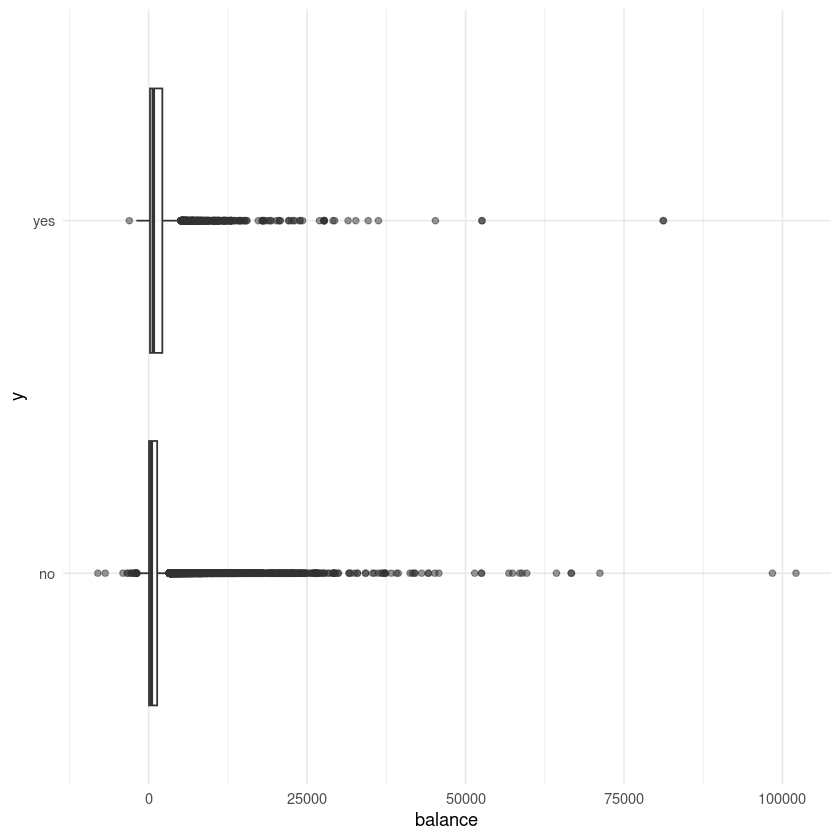

In [25]:
## balance
num_feature %>%
	ggplot(aes(x = balance, y = y)) +
	geom_boxplot(alpha = 0.5) +
	theme_minimal()

the distribution of age is right-skew and some observation has negative balance (which is not make sence)
with mean, median, sd and IQR below :

### Implementation note
1. we will covert categorical to factor in cleaning process
2. filter out some negtive value in balance feature 

In [26]:
## balance
num_feature %>%
	group_by(y) %>%
	summarize(Mean_balance = round(mean(balance), 2),
			  Median_balance = median(balance),
			  sd_balance = round(sd(balance), 2),
			  IQR_balance = IQR(balance)
			 )

y,Mean_balance,Median_balance,sd_balance,IQR_balance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
no,1303.71,417,2974.2,1287
yes,1804.27,733,3501.1,1949


duration - last contact duration, in seconds 

Warning message:
“Removed 59 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_bar()`).”


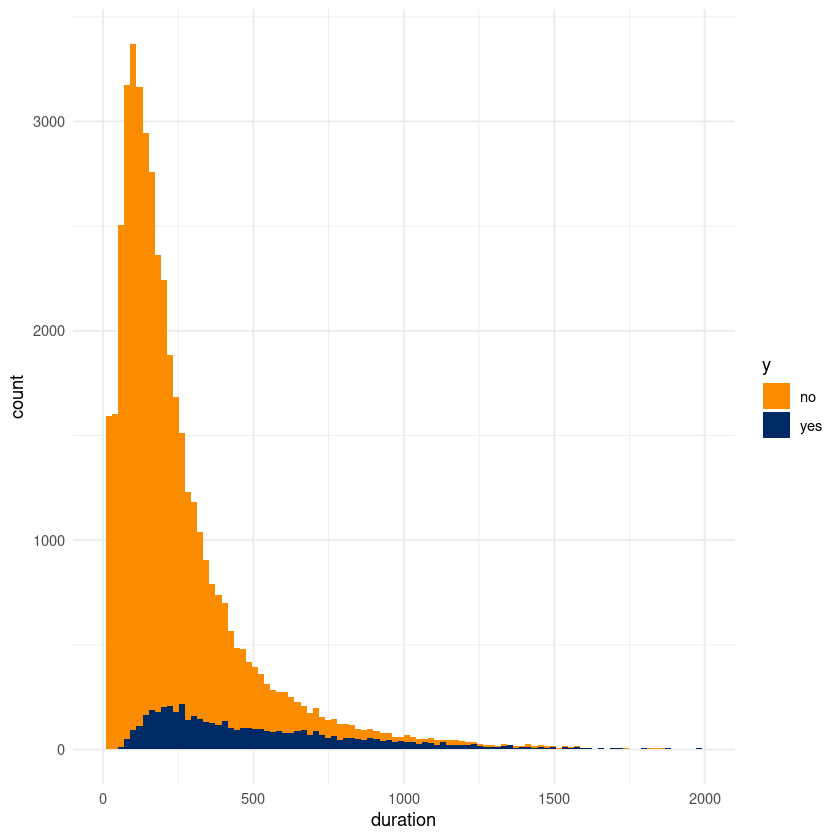

In [27]:
num_feature %>%
	ggplot(aes(duration, fill = y)) +
	geom_histogram(bins = 100) +
	scale_fill_manual( values = c("#fb8c00ff", "#002a66ff")) +
	xlim(0, 2000) +
	theme_minimal()

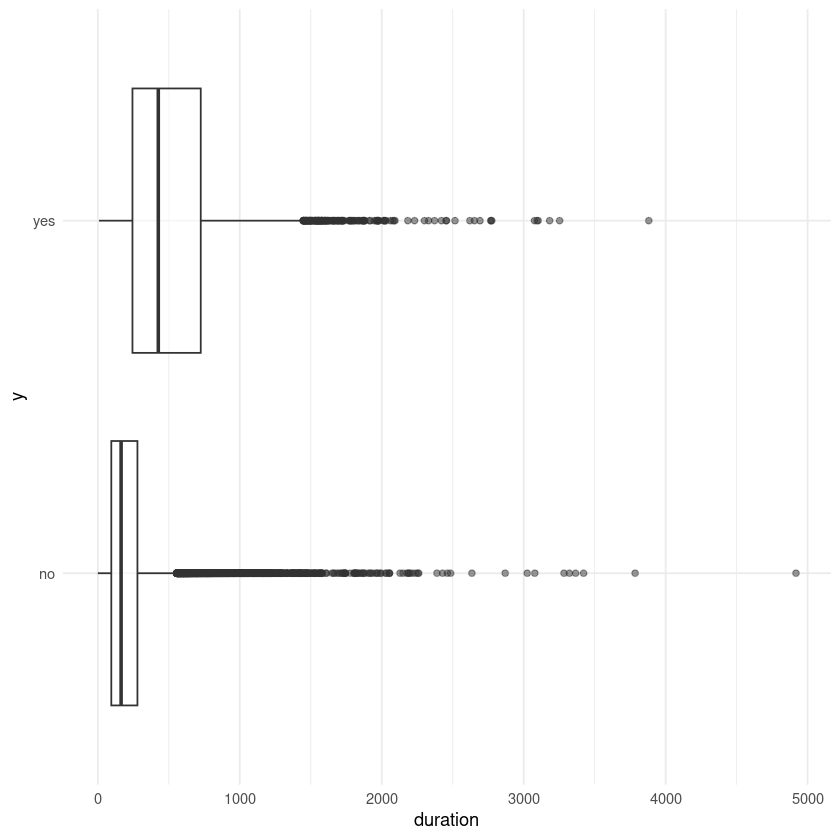

In [28]:
## duration
num_feature %>%
	ggplot(aes(x = duration, y = y)) +
	geom_boxplot(alpha = 0.5) +
	theme_minimal()

the distribution of age is right-skew with mean, median, sd and IQR below :

In [29]:
## duration
num_feature %>%
	group_by(y) %>%
	summarize(Mean_duration = round(mean(duration), 2),
			  Median_duration = median(duration),
			  sd_duration = round(sd(duration), 2),
			  IQR_duration = IQR(duration)
			 )

y,Mean_duration,Median_duration,sd_duration,IQR_duration
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
no,221.18,164,207.38,184
yes,537.29,426,392.53,481


campaign - number of contacts performed during this campaign and for this client (numeric, includes last contact)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 7 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_bar()`).”


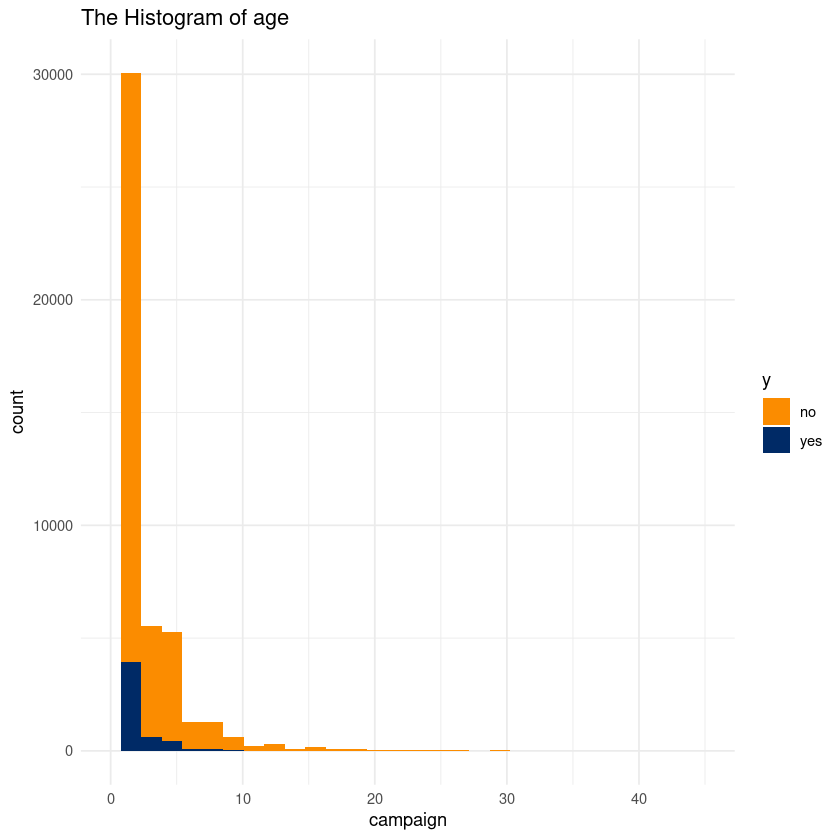

In [30]:
num_feature %>%
	ggplot(aes(campaign, fill = y)) +
	geom_histogram() +
	scale_fill_manual( values = c("#fb8c00ff", "#002a66ff")) +
	labs(title =  "The Histogram of age") +
	xlim(0, 45) +
	theme_minimal()

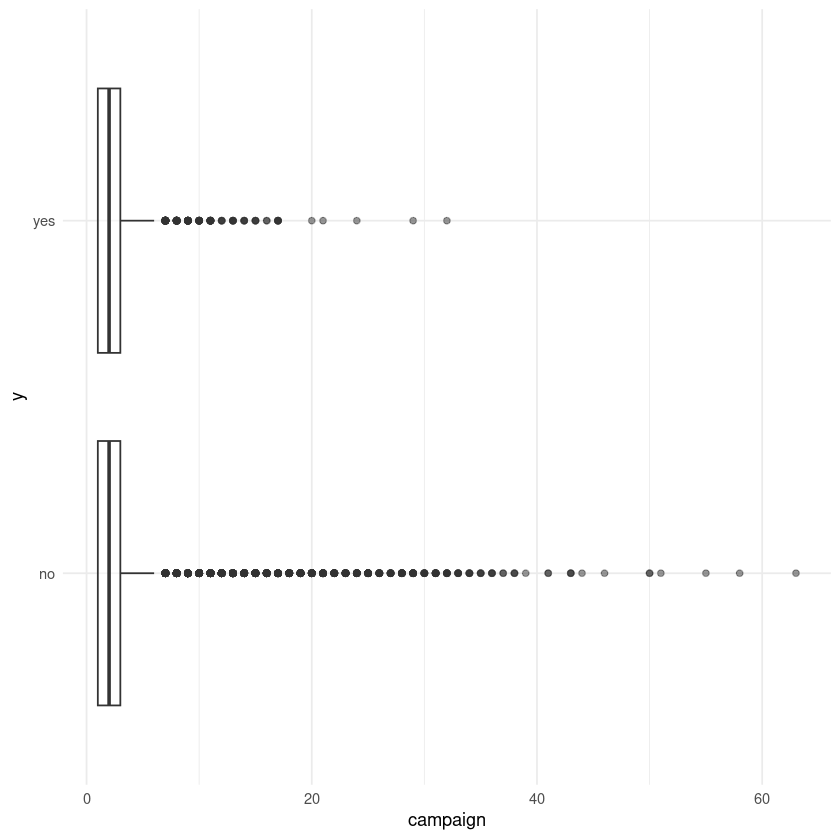

In [31]:
## Campaign
num_feature %>%
	ggplot(aes(x = campaign, y = y)) +
	geom_boxplot(alpha = 0.5) +
	theme_minimal()

mean, median, sd and IQR below :

In [32]:
## Campaign
num_feature %>%
	group_by(y) %>%
	summarize(Mean_campaign = round(mean(campaign), 2),
			  Median_campaign = median(campaign),
			  sd_campaign = round(sd(campaign), 2),
			  IQR_campaign = IQR(campaign)
			 )

y,Mean_campaign,Median_campaign,sd_campaign,IQR_campaign
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
no,2.85,2,3.21,2
yes,2.14,2,1.92,2


pdays - number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 73 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_bar()`).”


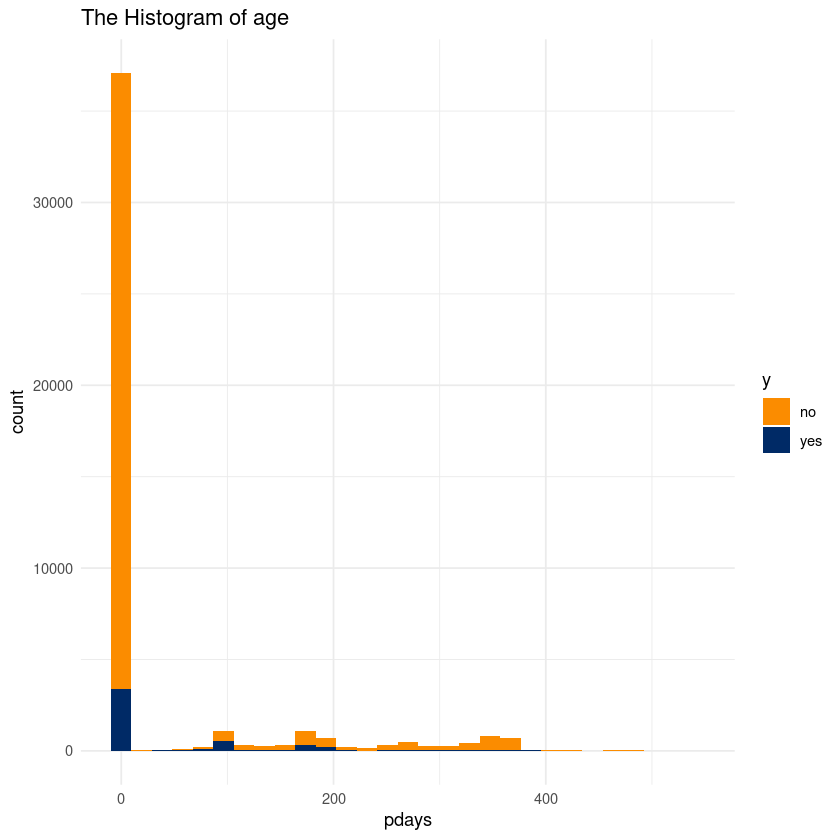

In [33]:
num_feature %>%
	ggplot(aes(pdays, fill = y)) +
	geom_histogram() +
	scale_fill_manual( values = c("#fb8c00ff", "#002a66ff")) +
	labs(title =  "The Histogram of age") +
	xlim(-10, 550) +
	theme_minimal()

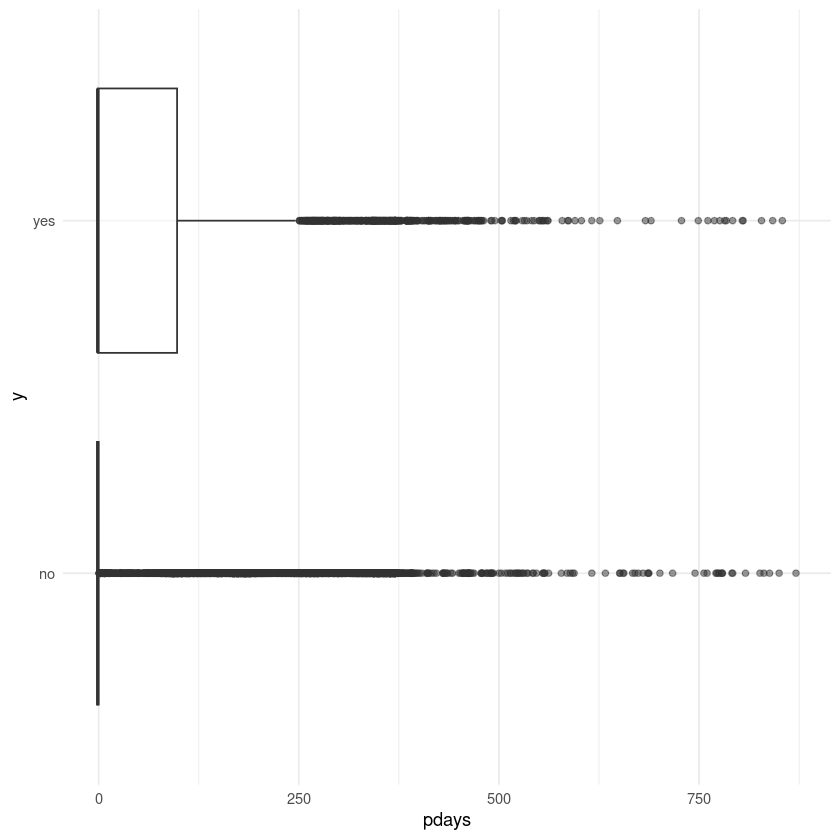

In [34]:
## pdays
num_feature %>%
	ggplot(aes(x = pdays, y = y)) +
	geom_boxplot(alpha = 0.5) +
	theme_minimal()

mean, median, sd and IQR below :

### Implementation note
1. we will covert categorical to factor in cleaning process
2. filter out some negtive value in balance feature 
3. in feature pdays convert -1 to 0

In [35]:
## pdays
num_feature %>%
	group_by(y) %>%
	summarize(Mean_pdays = round(mean(pdays), 2),
			  Median_pdays = median(pdays),
			  sd_pdays = round(sd(pdays), 2),
			  IQR_pdays = IQR(pdays)
			 )

y,Mean_pdays,Median_pdays,sd_pdays,IQR_pdays
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
no,36.42,-1,96.76,0
yes,68.70,-1,118.82,99


### Take Away
- client who interest on time deposit seem to take longer contract duration



### Cleaning and Preparing Data
Implementation note
1. we will covert categorical to factor in cleaning process
2. filter out some negtive value in balance feature 
3. in feature pdays convert -1 to 0

Remoce unuse feature : `day`, `month`

In [36]:
## remove unuse feature : day, month
df_final <- df %>%
	select(-day, -month) 

head(df_final, 5)

age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no


covert `categorical` to `factor`

In [37]:
## connert charector to factor
char_col <- sapply(df_final, is.character)
df_final[char_col] <- lapply(df_final[char_col], as.factor)

#glimpse(df_final)

filter out some `negtive value` in balance feature 

Warning message:
“Removed 8501 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


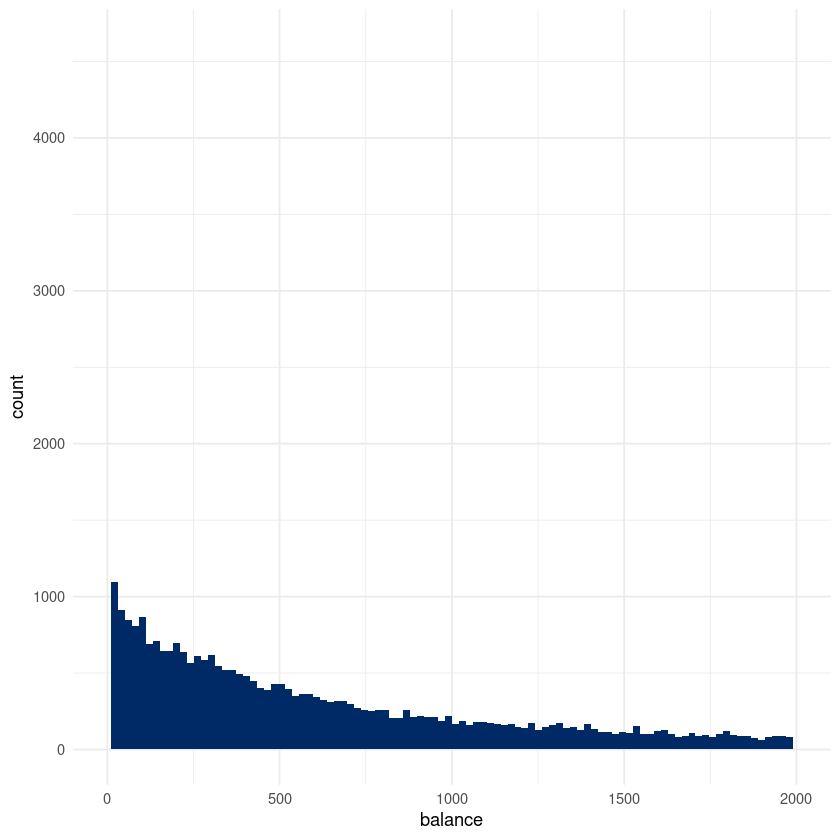

In [38]:
## in feature balance remove observations that are negative
df_final <- df_final %>%
	filter(balance >= 0)

df_final %>%
	ggplot(aes(balance)) +
	geom_histogram(bins = 100, fill = "#002a66ff") +
	xlim(0, 2000) +
	theme_minimal()

in feature pdays `convert -1 to 0`

In [39]:
## pdays feature convert -1 to 0
df_final <- df_final %>%
	mutate(pdays = ifelse(pdays == -1, 0, pdays))

head(df_final, 5)

age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
58,management,married,tertiary,no,2143,yes,no,unknown,261,1,0,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,151,1,0,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,0,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,0,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,198,1,0,0,unknown,no


In [40]:
glimpse(df_final)

Rows: 41,445
Columns: 15
$ age       <dbl> 58, 44, 33, 47, 33, 35, 28, 42, 58, 43, 41, 29, 53, 58, 57, …
$ job       <fct> management, technician, entrepreneur, blue-collar, unknown, …
$ marital   <fct> married, single, married, married, single, married, single, …
$ education <fct> tertiary, secondary, secondary, unknown, unknown, tertiary, …
$ default   <fct> no, no, no, no, no, no, no, yes, no, no, no, no, no, no, no,…
$ balance   <dbl> 2143, 29, 2, 1506, 1, 231, 447, 2, 121, 593, 270, 390, 6, 71…
$ housing   <fct> yes, yes, yes, yes, no, yes, yes, yes, yes, yes, yes, yes, y…
$ loan      <fct> no, no, yes, no, no, no, yes, no, no, no, no, no, no, no, no…
$ contact   <fct> unknown, unknown, unknown, unknown, unknown, unknown, unknow…
$ duration  <dbl> 261, 151, 76, 92, 198, 139, 217, 380, 50, 55, 222, 137, 517,…
$ campaign  <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ pdays     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ previous  <db

### Train and Test model
- spliting dataset to `80%` for training and `20%` for testing
- using resample techique : `K-folder Cross Vlidation`
- automatic data preprocessing : Normalization, Box-cox tranformation
- 3 model candicate : logistic Regression (Base line), Random Forest, XGBoost

spliting dataset to `80%` (33,156 rows) for training and `20%` (8,289 rows) for testing 

In [41]:
## spliting dataset to 80% for training and 20% for testing
n <- nrow(df_final)
id <- sample(1:n, size = 0.8 * n)
train_df <- df_final[id, ]
test_df <- df_final[-id, ]

paste("Number of Train Data : ", nrow(train_df))
paste("Number of Test Data : ", nrow(test_df))


[1] "Number of Train Data :  33156"

[1] "Number of Test Data :  8289"

using resample techique : K-folder Cross Vlidation (using `5 folders`)

In [42]:
## using resample techique : K-folder Cross Vlidation
ctrl <- trainControl(
	method = "cv",
	number = 5,
)

**Logistic Regrssion Model**

Target column is `y` (has the client purchased a term deposit?) and feature will be all feature except `y`

In [43]:
## Logistic Regression
## train model
set.seed(42)
glm_model <- train(
	y ~.,
	data = train_df,
	method = "glm",
	trControl = ctrl,
	preProcess = c("center", "scale", "BoxCox"),
	metric = "F1"
)

glm_model

Warning message in train.default(x, y, weights = w, ...):
“The metric "F1" was not in the result set. Accuracy will be used instead.”


Generalized Linear Model 

33156 samples
   14 predictor
    2 classes: 'no', 'yes' 

Pre-processing: centered (30), scaled (30), Box-Cox transformation (2) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 26525, 26525, 26525, 26525, 26524 
Resampling results:

  Accuracy   Kappa    
  0.8955843  0.3903981


**Random Forest**

Randomforest has hyperparameter `(mtry)` that we can adjust. but in this model training we will let caret automatically tune this parameter

In [44]:
## Random Forest
## train model
set.seed(42)
rf_model <- train(
	y ~.,
	data = train_df,
	method = "rf",
	trControl = ctrl
)

rf_model

Random Forest 

33156 samples
   14 predictor
    2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 26525, 26525, 26525, 26525, 26524 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.8881650  0.1991480
  16    0.8937145  0.4306983
  30    0.8917541  0.4247970

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 16.

**eXtreme Gradient Boosting**

eXtreme Gradient Boosting has hyperparameter `(nrounds, lambda, alpha, eta)` that we can adjust. but in this model training we will let caret automatically tune this parameter

In [45]:
## Xgboost
## train model
set.seed(42)
xgb_model <- train(
	y ~.,
	data = train_df,
	method = "xgbLinear",
	trControl = ctrl
)

xgb_model

eXtreme Gradient Boosting 

33156 samples
   14 predictor
    2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 26525, 26525, 26525, 26525, 26524 
Resampling results across tuning parameters:

  lambda  alpha  nrounds  Accuracy   Kappa    
  0e+00   0e+00   50      0.8948606  0.4285705
  0e+00   0e+00  100      0.8926287  0.4232098
  0e+00   0e+00  150      0.8919048  0.4264135
  0e+00   1e-04   50      0.8948606  0.4285705
  0e+00   1e-04  100      0.8927795  0.4242060
  0e+00   1e-04  150      0.8912112  0.4208260
  0e+00   1e-01   50      0.8959765  0.4336444
  0e+00   1e-01  100      0.8940463  0.4330252
  0e+00   1e-01  150      0.8924780  0.4306439
  1e-04   0e+00   50      0.8948606  0.4285705
  1e-04   0e+00  100      0.8924779  0.4223224
  1e-04   0e+00  150      0.8916937  0.4243491
  1e-04   1e-04   50      0.8945289  0.4275277
  1e-04   1e-04  100      0.8924478  0.4222042
  1e-04   1e-04  150      0.8916334  0.4229811

### Select and Evaluate model

### Take Away
eXtreme Gradient Boosting perform better than Logistic Regrssion and Random Forest, in eXtreme Gradient Boosting  model caret
automatically tune hyperparameter by using nrounds = 50, lambda = 0, alpha
 = 0.1 and eta = 0.3
 for final model since model provide highest accuracy

**model evaluation**

In [46]:
## Predicting
p_3 <- predict(xgb_model, newdata = test_df)

## evaluate model
confusionMatrix(p_3, test_df$y,
			    mode = "prec_recall")

Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  7046  566
       yes  276  401
                                          
               Accuracy : 0.8984          
                 95% CI : (0.8917, 0.9048)
    No Information Rate : 0.8833          
    P-Value [Acc > NIR] : 7.141e-06       
                                          
                  Kappa : 0.4334          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
              Precision : 0.9256          
                 Recall : 0.9623          
                     F1 : 0.9436          
             Prevalence : 0.8833          
         Detection Rate : 0.8500          
   Detection Prevalence : 0.9183          
      Balanced Accuracy : 0.6885          
                                          
       'Positive' Class : no              
                                          

We test our candidate model with unseen data set,
found that :

Our candidate perform well with unseen data 

- 89.84 % Accuracy
- 92.56 % Precision
- 96.23 % Recall 
- 94.36 % F1

(It means that if we have 100 customers, the model will correctly predict whether to advertise to this customer or not for approximately 90 of them.)


In [47]:
## Evauating and Selecting Model
## Use F1 Score for modeling selecting -> Random Forest
varImp(xgb_model)


xgbLinear variable importance

  only 20 most important variables shown (out of 30)

                    Overall
duration           100.0000
poutcomesuccess     29.4778
balance             17.2452
age                 16.2265
pdays               13.7308
contactunknown      12.0008
housingyes           9.3262
campaign             5.9628
loanyes              2.8545
previous             1.8108
educationtertiary    1.4037
maritalmarried       1.3479
jobblue-collar       1.2238
educationsecondary   1.0638
contacttelephone     1.0244
maritalsingle        0.6892
jobentrepreneur      0.5832
jobservices          0.5153
jobstudent           0.4815
jobtechnician        0.4804